## IMDB 데이터셋으로 LSTM 학습시키기

In [1]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

C:\Users\028\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,) (25000,)
(25000,) (25000,)


C:\Users\028\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 350
# X_train의 모든 문장의 길이를 350으로 고정한다.
pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_X_train[0]))

350


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 390,305
Trainable params: 390,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 160s 257ms/step - loss: 0.4377 - acc: 0.7961 - val_loss: 0.3275 - val_acc: 0.8696
Epoch 2/15
625/625 [==============================] - 157s 251ms/step - loss: 0.2619 - acc: 0.9011 - val_loss: 0.3191 - val_acc: 0.8584
Epoch 3/15
625/625 [==============================] - 157s 251ms/step - loss: 0.1967 - acc: 0.9291 - val_loss: 0.3283 - val_acc: 0.8770
Epoch 4/15
625/625 [==============================] - 158s 253ms/step - loss: 0.1526 - acc: 0.9463 - val_loss: 0.3755 - val_acc: 0.8476
Epoch 5/15
625/625 [==============================] - 158s 253ms/step - loss: 0.1147 - acc: 0.9614 - val_loss: 0.3564 - val_acc: 0.8622
Epoch 6/15
625/625 [==============================] - 157s 251ms/step - loss: 0.0877 - acc: 0.9718 - val_loss: 0.4613 - val_acc: 0.8642
Epoch 7/15
625/625 [==============================] - 158s 252ms/step - loss: 0.0680 - acc: 0.9782 - val_loss: 0.4925 - val_acc: 0.8410
Epoch 8/15
625/625 [============================

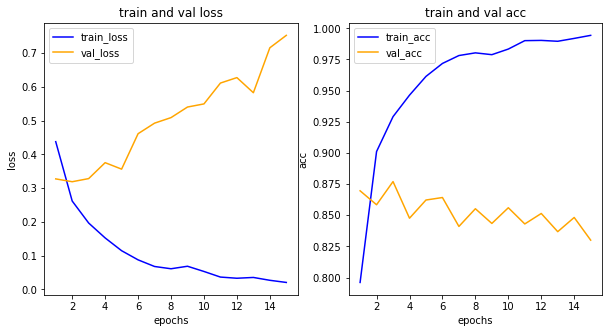

In [6]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## reuters 데이터셋 다뤄보기

In [7]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_X_train[0]))

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\028\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\028\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


(8982,) (8982,)
(2246,) (2246,)
500


## LSTM 층을 사용하여 모델 구성하기

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

## 모델 학습하기

In [9]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 20, 
                    validation_split = 0.2)

Epoch 1/20
225/225 [==============================] - 69s 306ms/step - loss: 2.5619 - acc: 0.3496 - val_loss: 2.4126 - val_acc: 0.3450
Epoch 2/20
225/225 [==============================] - 67s 300ms/step - loss: 2.4127 - acc: 0.3534 - val_loss: 2.4082 - val_acc: 0.3450
Epoch 3/20
225/225 [==============================] - 67s 296ms/step - loss: 2.2857 - acc: 0.3854 - val_loss: 2.0691 - val_acc: 0.4786
Epoch 4/20
225/225 [==============================] - 121s 540ms/step - loss: 1.8748 - acc: 0.5042 - val_loss: 1.8989 - val_acc: 0.4869
Epoch 5/20
225/225 [==============================] - 140s 620ms/step - loss: 1.7256 - acc: 0.5481 - val_loss: 1.7749 - val_acc: 0.5242
Epoch 6/20
225/225 [==============================] - 142s 629ms/step - loss: 1.6715 - acc: 0.5711 - val_loss: 1.7329 - val_acc: 0.5576
Epoch 7/20
225/225 [==============================] - 110s 491ms/step - loss: 1.5734 - acc: 0.6064 - val_loss: 1.6746 - val_acc: 0.5793
Epoch 8/20
225/225 [==============================]

## 학습과정 그리기

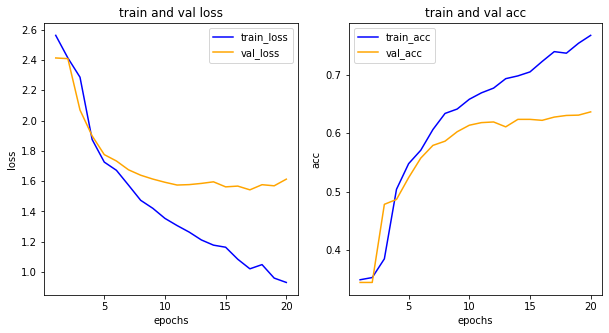

In [10]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()